In [67]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [68]:
df = pd.read_csv("/content/Obesity.csv")

In [69]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [70]:
df.shape

(2111, 17)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [72]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [73]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [74]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

df


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2102 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2101 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2105 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2102 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

In [76]:
# Replace NaN values in 'Obesity' and 'Transportation used' columns before applying string operations
df['Obesity'] = df['Obesity'].fillna('')
df['Transportation used'] = df['Transportation used'].fillna('')

# Apply string operations after handling NaN values
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))

# Convert height to centimeters and round to 1 decimal place
df['Height'] = (df['Height'] * 100).round(1)

# Round Weight and Age to 1 decimal place
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)


In [77]:

df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [78]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))


Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


## Exploratory Data Analysis

In [79]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())


Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [80]:
df1 = df.copy()

In [81]:
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

In [82]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [83]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III


<Axes: xlabel='Gender', ylabel='Weight'>

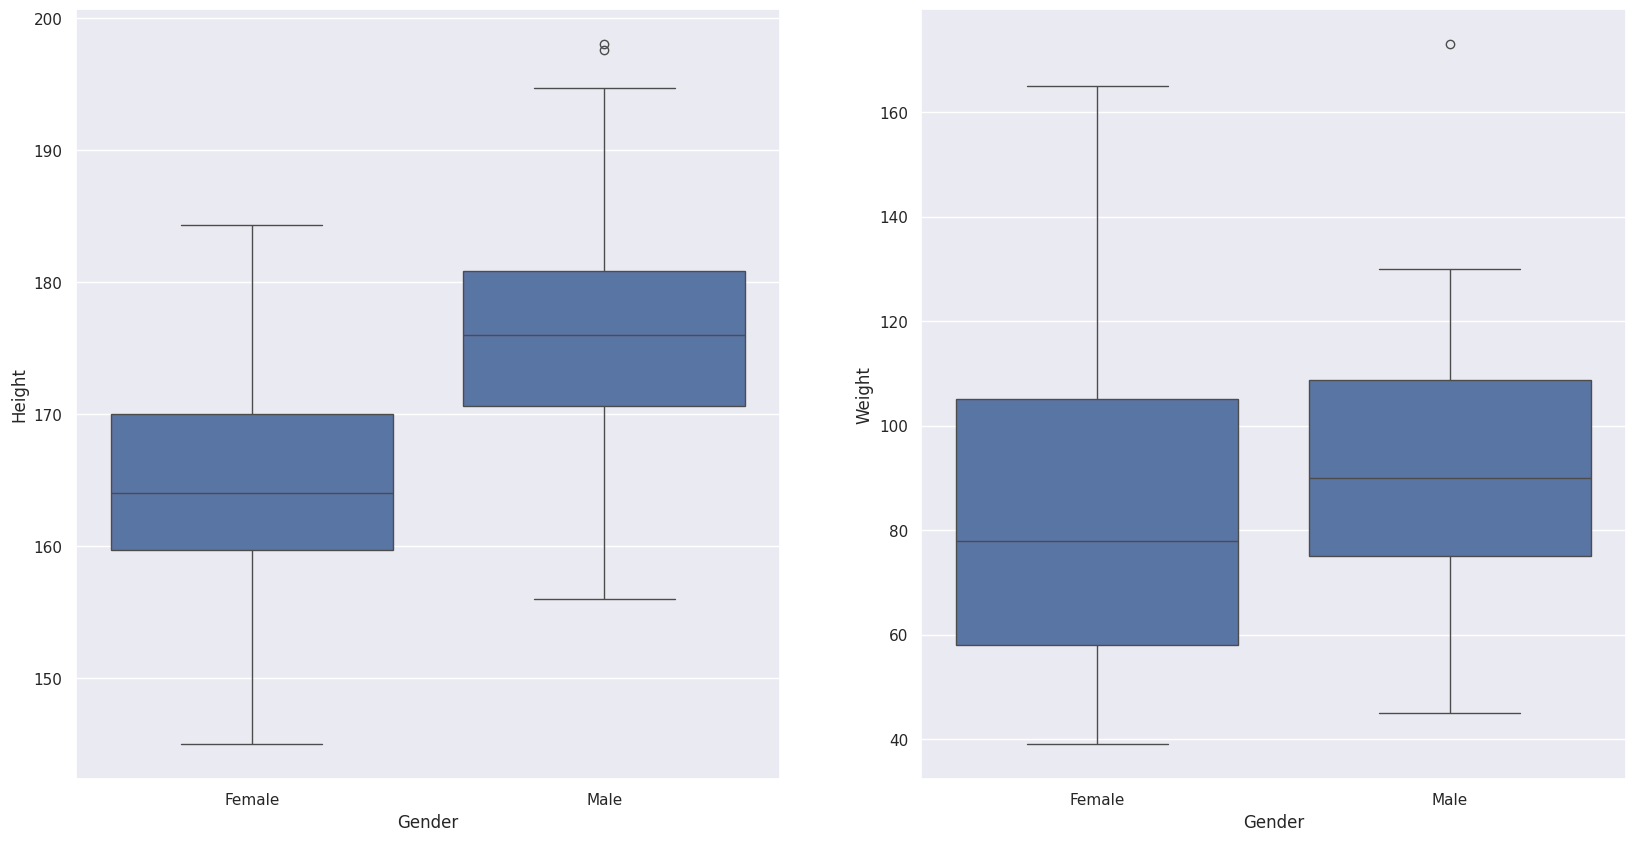

In [84]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

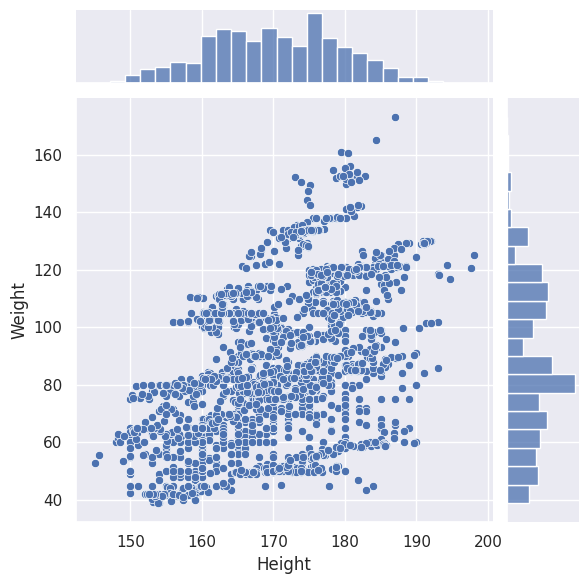

In [85]:
sns.jointplot(x='Height', y='Weight', data=df, kind='scatter')
plt.show()

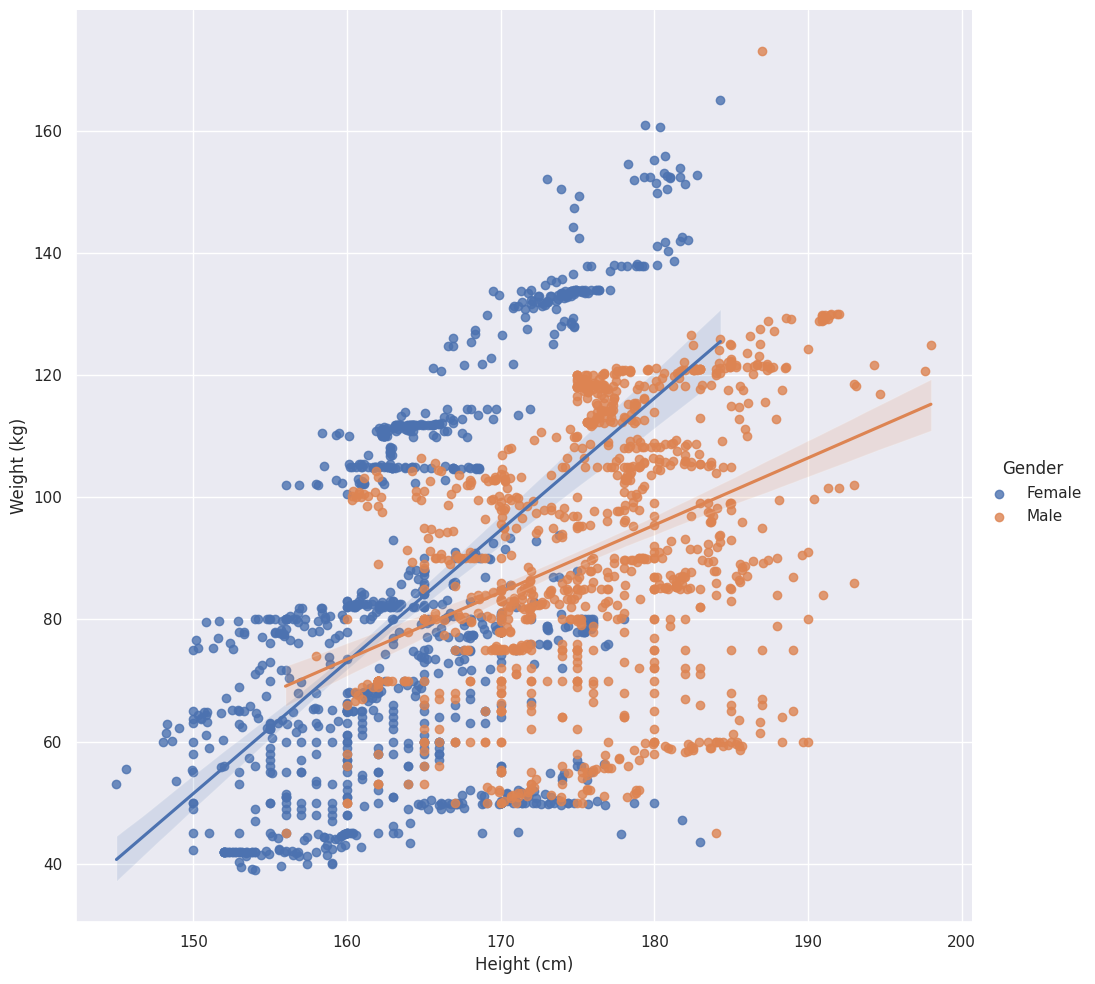

In [86]:
g = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

### Obesity

In [87]:
c = Counter(df['Obesity'])
print(c)

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


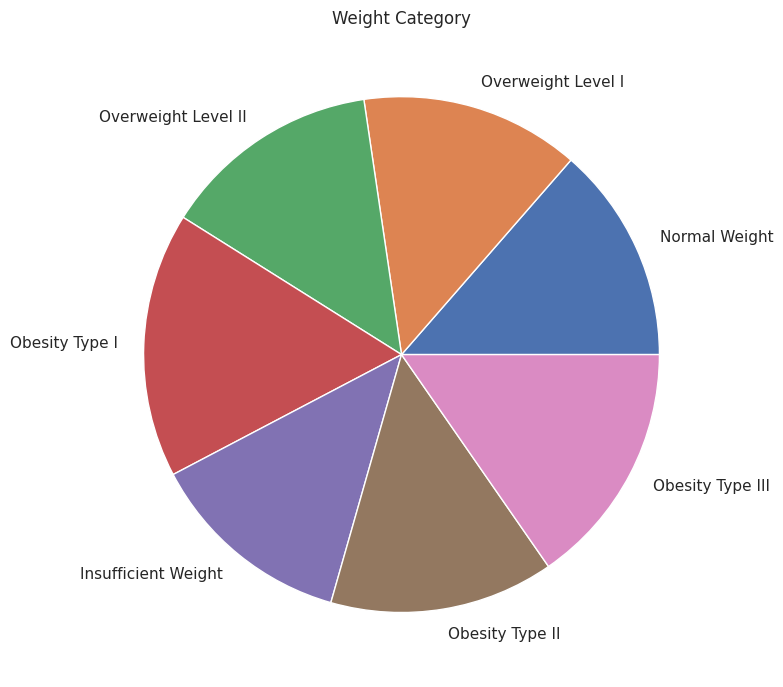

In [88]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category')
plt.tight_layout()

In [89]:
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(df.loc[~filt, 'Obesity'])
print(c_f)

Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Overweight Level I': 145, 'Normal Weight': 140, 'Insufficient Weight': 98, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 174, 'Obesity Type I': 156, 'Normal Weight': 147, 'Overweight Level I': 145, 'Overweight Level II': 103, 'Obesity Type II': 2})


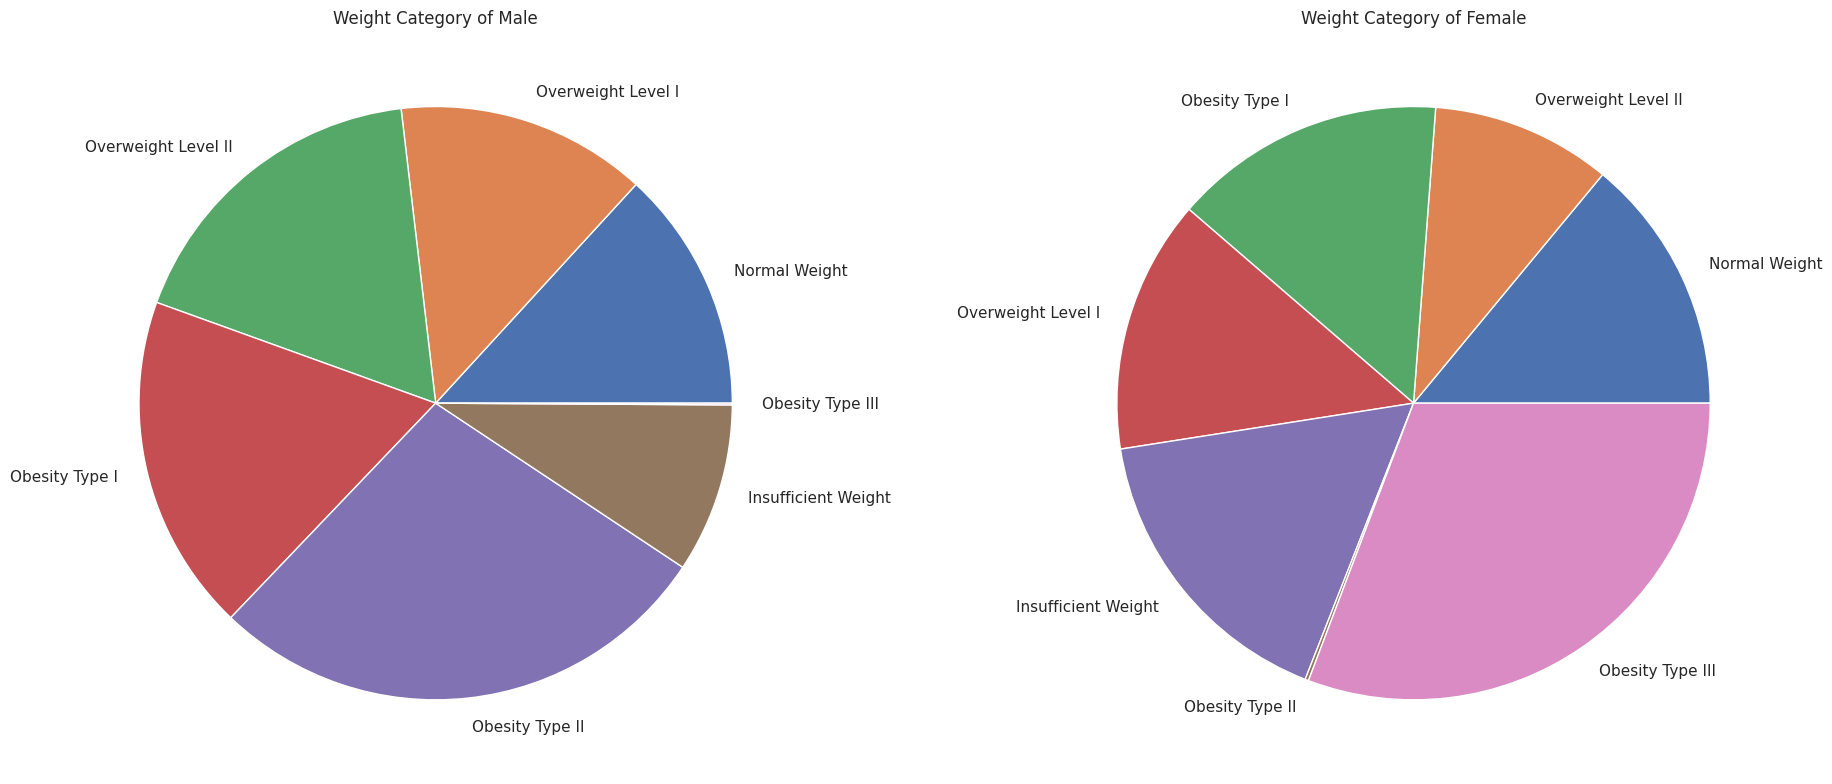

In [90]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female')
plt.tight_layout()

Family History with Overweight ['yes', 'no'] [1722, 383]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '3+'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1758, 241, 53, 50]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 L', 'More than 2 L', 'Less than a liter'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2008, 96]
Physical activity frequency ['1 or 2 days', 'I do not have', '2 or 4 days', '4 or 5 days'] [776, 720, 496, 119]
Time using technology devices ['0–2 hours', '3–5 hours', 'More than 5 hours'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', '', 'Bike'] [1576, 455, 55, 11, 7, 7]


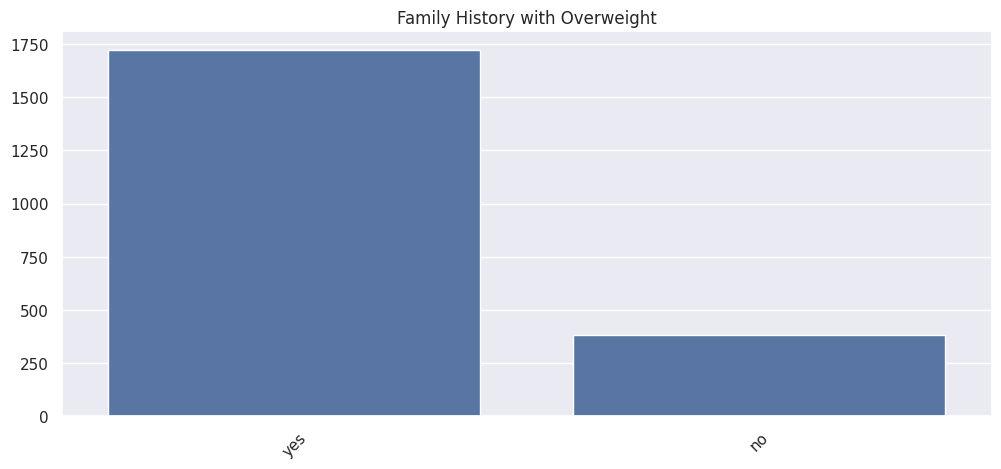

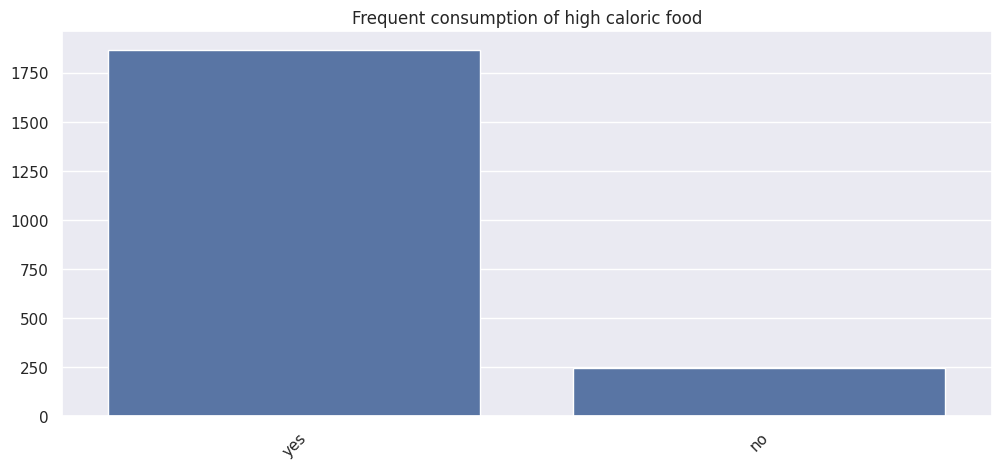

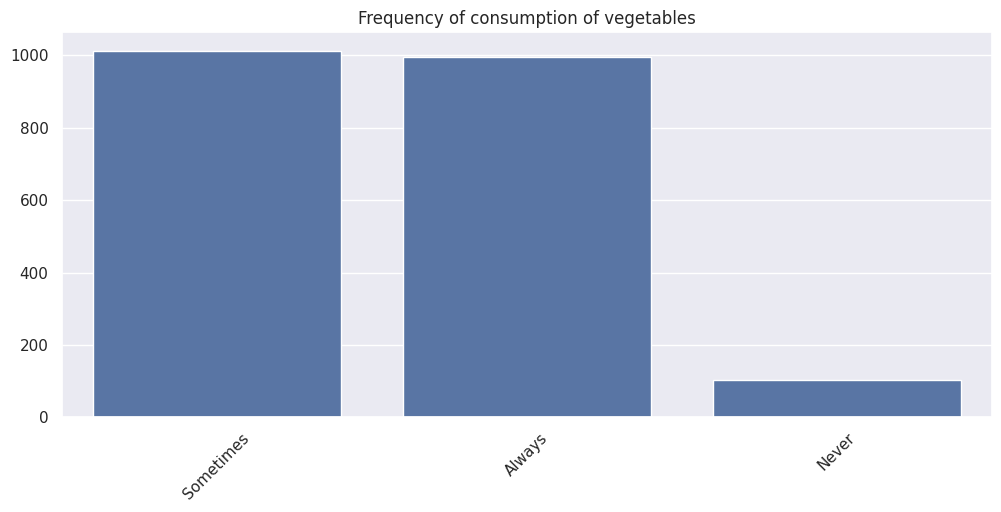

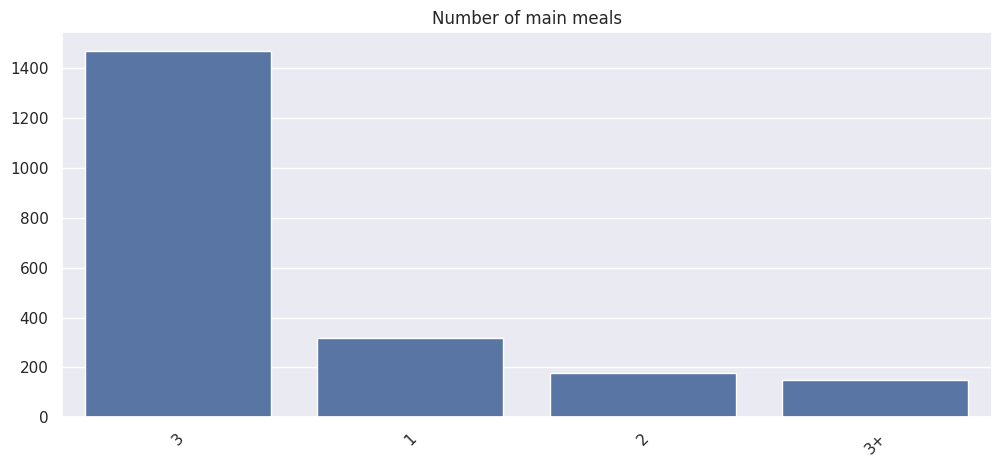

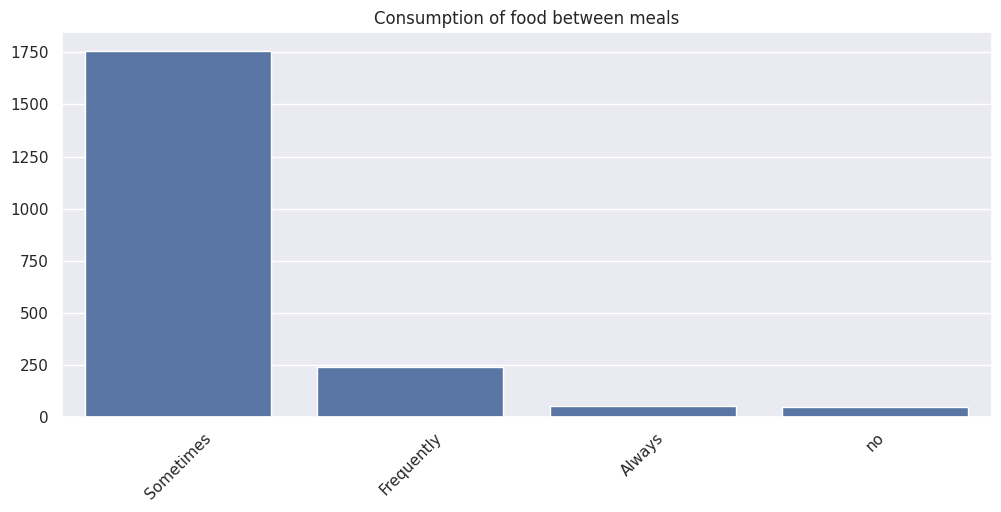

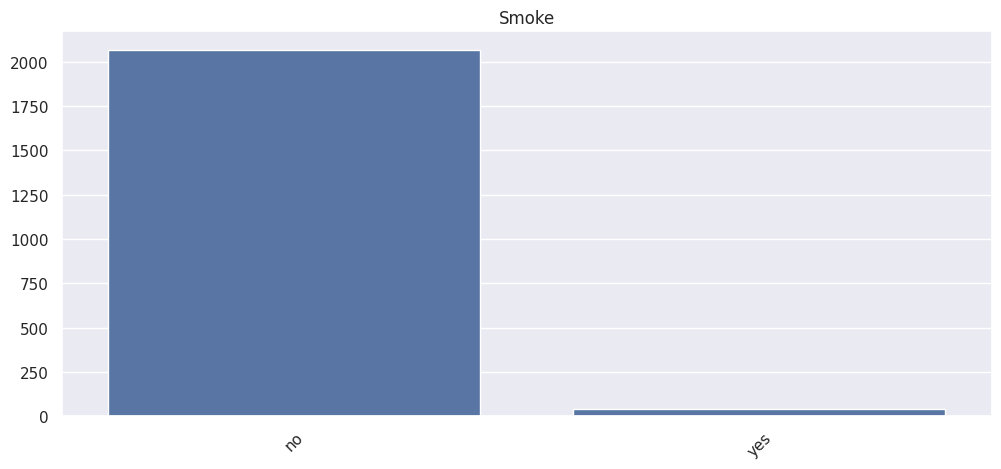

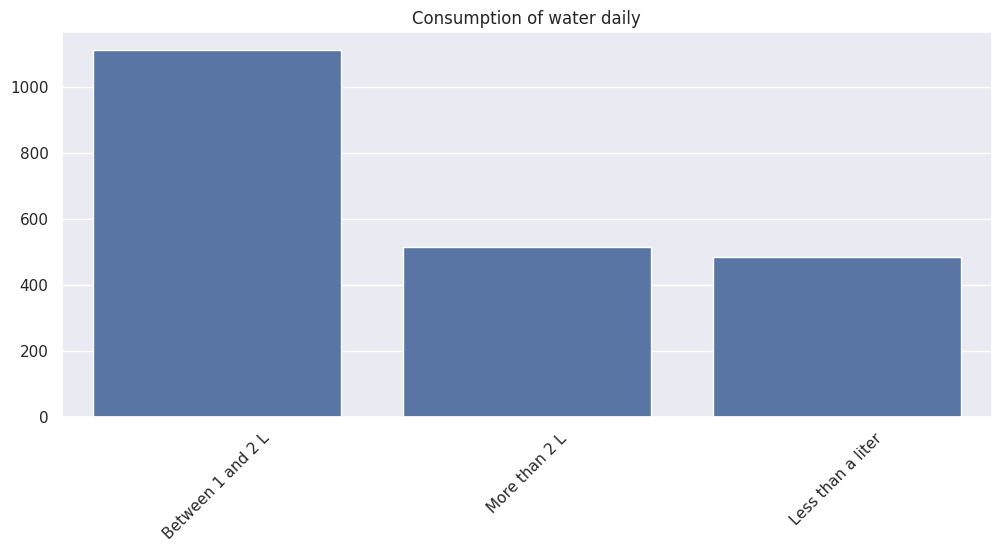

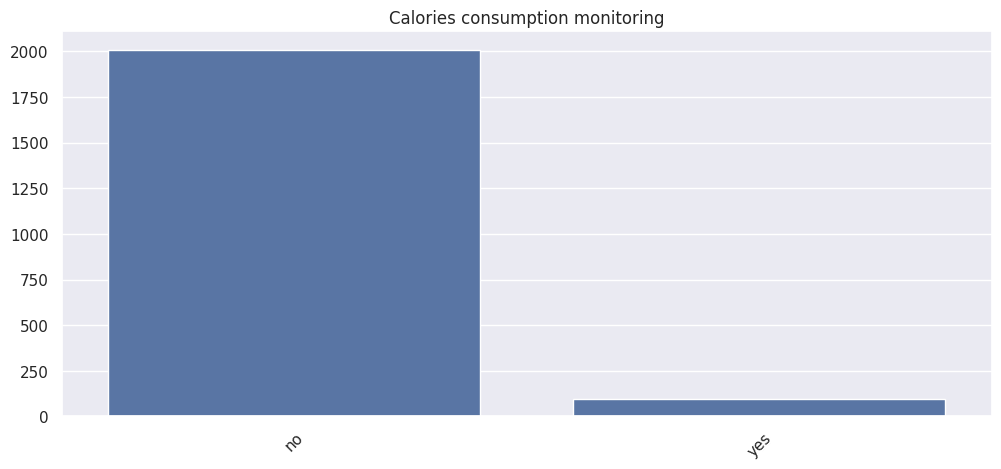

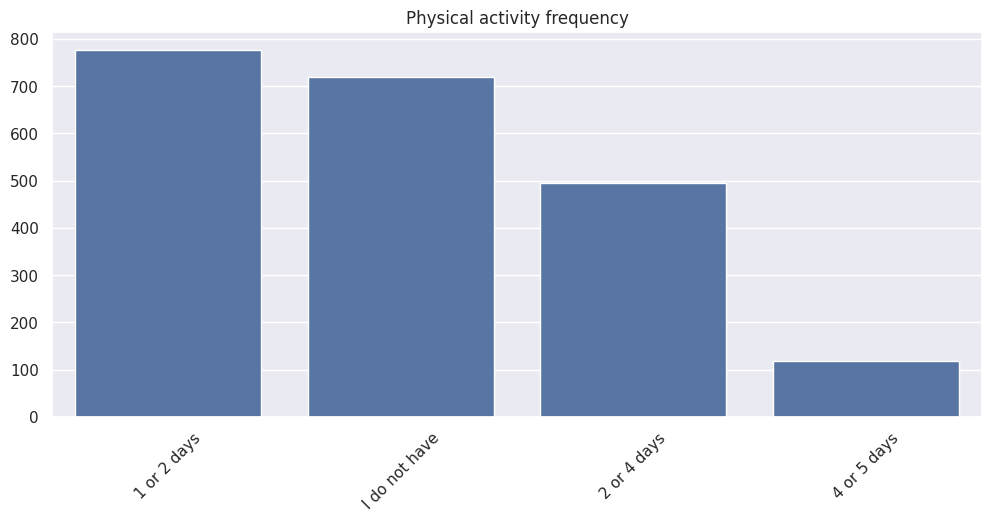

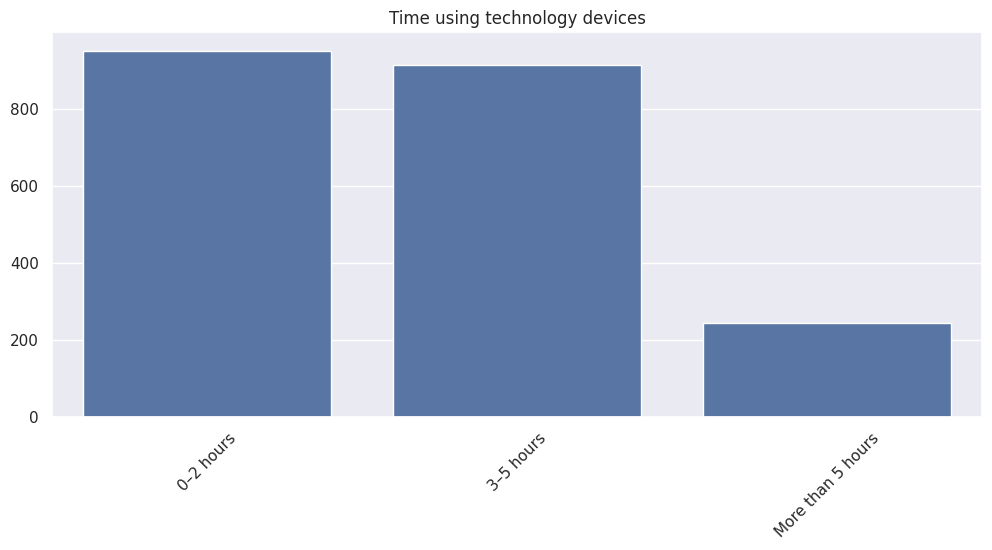

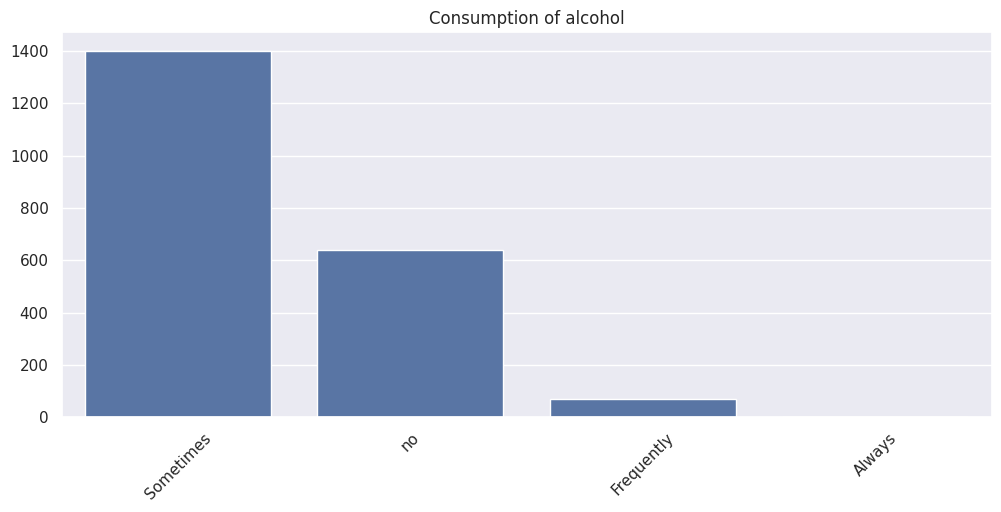

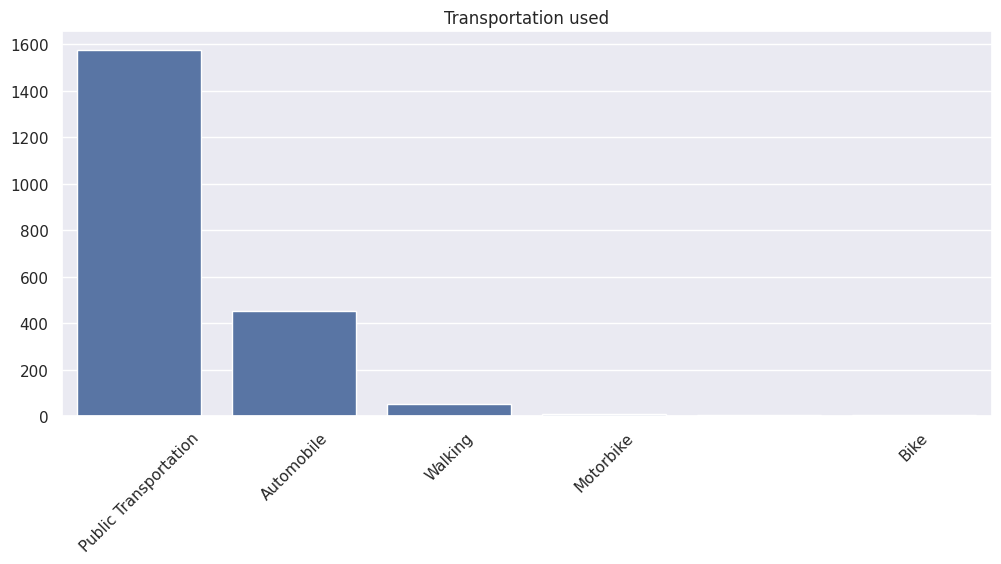

In [91]:
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()

    plt.figure(figsize=(12,5))
    ax = sns.barplot(x = values, y = counts)

    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

## Data Preprocessing

In [92]:
df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


In [93]:
# identity categorical variables (data type would be 'object')
cat = df1.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

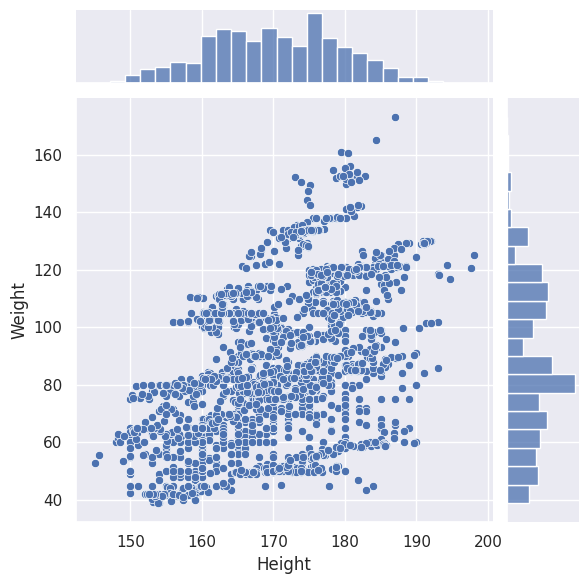

In [94]:
# Assuming df is your DataFrame and 'Height' and 'Weight' are columns in it
# Define labels
labels = {'x': 'Height', 'y': 'Weight'}

# Use labels in jointplot
sns.jointplot(x=labels['x'], y=labels['y'], data=df, kind='scatter')
plt.show()

In [95]:
df1.head(3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight


In [96]:
df1.columns

def col_no(x):
    d = {}
    d[df1.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(df1.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [97]:
x = df1[df1.columns[:-1]]
y = df['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [98]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([5, 4, 4, ..., 5, 4, 6])

In [99]:
Scale_features = ['Age', 'Height', 'Weight']
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

Ordi_features = ['Consumption of food between meals', 'Consumption of alcohol']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', Scale_transformer, Scale_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder = 'passthrough')

clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [100]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
                                                                   OrdinalEncoder())]),
                                                  ['Consumption of food '
                                                   'between meals',
                                                   'Consumption of alcohol']),
                                                 ('Non-Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Non-O',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Calories consumption '
                                                   'monitoring',
                                                   'Transportation used'])]))])

In [101]:
trans_df = clf.fit_transform(x_train)
print(trans_df.shape)

(1899, 29)


In [102]:
# Column name of first two steps in pipeline

cols = [y for x in [Scale_features, Ordi_features] for y in x]
cols

['Age',
 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol']

In [103]:
# Column names of OneHotEncoder step in pipeline

ohe_cols = clf.named_steps['preprocessor'].transformers_[2][1]\
    .named_steps['Non-O'].get_feature_names_out(NonO_features)
ohe_cols = [x for x in ohe_cols]

In [104]:
# Column names of remainder='Passthrough' - remaining columns that didn't get processed
non_cat

Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')

In [107]:
transformed_x_train = pd.DataFrame(trans_df, columns= ['Age', 'Height',
 'Weight',
 'Consumption of food between meals_always','Consumption of food between meals_sometimes','Consumption of food between meals_frequently',
 'Consumption of alcohol_sometime','Consumption of alcohol_frequently','Consumption of alcohol_no','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])

In [108]:
# transformed/processed features

transformed_x_train

,Age,Height,Weight,Consumption of food between meals_always,Consumption of food between meals_sometimes,Consumption of food between meals_frequently,Consumption of alcohol_sometime,Consumption of alcohol_frequently,Consumption of alcohol_no,Gender_Female,...,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,-0.462946,0.536026,-0.292908,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,0.0
1,-0.369448,0.321265,1.769494,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,2.0,2.0,1.0
2,0.204896,-0.784754,0.770817,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,0.0,1.0
3,-0.462946,-0.022353,-1.444639,3.0,2.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,3.0,3.0,3.0,1.0
4,0.004544,-0.849182,0.414967,2.0,3.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1.300157,-0.226375,-0.357956,2.0,3.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0
1895,-0.409518,0.224623,-1.375765,1.0,2.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,2.0,1.0,0.0
1896,-0.636585,1.233999,-0.009758,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0
1897,0.191539,-1.010253,0.594805,2.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,0.0,1.0


In [109]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Obesity Type I', 3: 'Obesity Type II', 4: 'Obesity Type III', 5: 'Overweight Level I', 6: 'Overweight Level II'}


## Model Selection

In [110]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', Preprocessor),
                      ('classifier', classifier)])

    # training model
    pipe.fit(x_train, y_train)
    print(classifier)

    acc_score = pipe.score(x_test, y_test)
    print("model score: %.3f" % acc_score)

    # using the model to predict
    y_pred = pipe.predict(x_test)

    target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(y_test, y_pred, target_names=target_names))

    if acc_score > 0.8:
        top_class.append(classifier)

KNeighborsClassifier()
model score: 0.830
                     precision    recall  f1-score   support

Insufficient Weight       0.79      0.90      0.84        30
      Normal Weight       0.70      0.48      0.57        29
     Obesity Type I       0.83      1.00      0.91        30
    Obesity Type II       1.00      1.00      1.00        28
   Obesity Type III       1.00      1.00      1.00        30
 Overweight Level I       0.77      0.61      0.68        33
Overweight Level II       0.71      0.84      0.77        32

           accuracy                           0.83       212
          macro avg       0.83      0.83      0.82       212
       weighted avg       0.83      0.83      0.82       212

SVC(C=0.025, probability=True)
model score: 0.406
                     precision    recall  f1-score   support

Insufficient Weight       1.00      0.03      0.06        30
      Normal Weight       0.31      0.38      0.34        29
     Obesity Type I       0.22      0.93      0.36

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier()
model score: 0.929
                     precision    recall  f1-score   support

Insufficient Weight       0.93      0.87      0.90        30
      Normal Weight       0.83      0.86      0.85        29
     Obesity Type I       0.94      1.00      0.97        30
    Obesity Type II       1.00      0.93      0.96        28
   Obesity Type III       0.97      1.00      0.98        30
 Overweight Level I       0.91      0.91      0.91        33
Overweight Level II       0.94      0.94      0.94        32

           accuracy                           0.93       212
          macro avg       0.93      0.93      0.93       212
       weighted avg       0.93      0.93      0.93       212

RandomForestClassifier()
model score: 0.915
                     precision    recall  f1-score   support

Insufficient Weight       0.93      0.90      0.92        30
      Normal Weight       0.74      0.79      0.77        29
     Obesity Type I       1.00      1.00      1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier()
model score: 0.939
                     precision    recall  f1-score   support

Insufficient Weight       0.93      0.90      0.92        30
      Normal Weight       0.81      0.86      0.83        29
     Obesity Type I       0.97      1.00      0.98        30
    Obesity Type II       1.00      1.00      1.00        28
   Obesity Type III       1.00      1.00      1.00        30
 Overweight Level I       0.93      0.85      0.89        33
Overweight Level II       0.94      0.97      0.95        32

           accuracy                           0.94       212
          macro avg       0.94      0.94      0.94       212
       weighted avg       0.94      0.94      0.94       212

SGDClassifier()
model score: 0.684
                     precision    recall  f1-score   support

Insufficient Weight       0.97      0.97      0.97        30
      Normal Weight       0.78      0.48      0.60        29
     Obesity Type I       0.80      0.13      0.23        3

### Classification Report

In [111]:
top_class

[KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier()]